# <u>AUTOMATIDATA PROJECT</u>  
### FIRST OBJECTIVE:  
Conduct A Two Sample T-Test On The Relationship Between The Total Fare Amount Of Credit Card Payment Users And Cash Payment User  

### SECOND OBJECTIVE:  
Build A Regression Model To Predict Taxi Fares Using The Data Available

### IMPORTING PACKAGES

In [1]:
#Imports
#Packages for numerics + dataframes
import numpy as np
import pandas as pd

#Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Packages for mathematical operations
from scipy import stats

#Packages for machine learning model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error, mean_absolute_percentage_error

In [2]:
#Loading dataframe
df = pd.read_csv("2.0 YellowTaxiTripDataset.csv")

#EDA
print('''DATA EXPLORATION
Shape Of Dataframe: {}
Shape of Dataframe Post-Depulication: {}
Size of Dataframe: ({})
Total Count Of Missing Values: ({})'''.
format(df.shape,
       df.drop_duplicates().shape,
       df.size,
       df.isnull().sum().sum()))

print('\nDATA SUMMARY')
df.info()

print('\nDATA PREVIEW')
df.head()

DATA EXPLORATION
Shape Of Dataframe: (22699, 18)
Shape of Dataframe Post-Depulication: (22699, 18)
Size of Dataframe: (408582)
Total Count Of Missing Values: (0)

DATA SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-n

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


## <u>FIRST OBJECTIVE</u>  
Conduct A Two Sample T-Test On The Relationship Between The Total Fare Amount Of Credit Card Payment Users And Cash Payment User

In [3]:
# 1=credit card, 2=cash
#Generating average fare amount for credit card and cash 
df.groupby('payment_type')['fare_amount'].mean()[:2]

payment_type
1    13.429748
2    12.213546
Name: fare_amount, dtype: float64

### HYPOTHESIS  
**NULL HYPOTHESIS:** There Is **NO** Difference In The Average Fare Amount Between Customers Who Use *Credit Card* And Customers Who Use *Cash*.

**ALTERNATE HYPOTHESIS:** There is **A** Difference In The Average Fare Amount Between Customers Who Use *Credit Card* And Customers Who Use *Cash*.

In [4]:
#Hypothesis Testing, A/B test
credit_card = df[df['payment_type'] == 1]['fare_amount']
cash = df[df['payment_type'] == 2]['fare_amount']
stat, pvalue = stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

#Interpretation and insight
print('\nINTERPRETATION: \nThe p-value is {:.40f} which is significantly less than 0.05. Since the p-value is < 0.05, the null hypothesis is rejected. Meaning there is a statitical significance.'.
      format(pvalue))


INTERPRETATION: 
The p-value is 0.0000000000067973874730305178329809942221 which is significantly less than 0.05. Since the p-value is < 0.05, the null hypothesis is rejected. Meaning there is a statitical significance.


### INSIGHTS:  
Encouraging customers to pay with credit cards can generate more revenue for drivers.

## <u>SECOND OBJECTIVE</u>  
Build a regression model to predict taxi fares using the data available
1. [X] Clean The Data
2. [X] Create a Duration Column From Dropoff and Pickup Times

In [5]:
#Checking for duplicates and missing values
print('Pre-Deduplication: {} \nPost-Deduplication: {} \nTotal Count Of Missing Values: {}'.
      format(df.shape,df.drop_duplicates().shape,
             df.isna().sum().sum()))

#Displaying descriptive stats
df.describe()

Pre-Deduplication: (22699, 18) 
Post-Deduplication: (22699, 18) 
Total Count Of Missing Values: 0


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [6]:
#Converting columns to date time
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='mixed')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='mixed')

#Creating duration column in minutes
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')
df[['duration']][:5]

,duration
0,14.066667
1,26.500000
2,7.200000
3,30.250000
4,16.716667


In [7]:
#Generating summary of configured columns
df[['tpep_pickup_datetime','tpep_dropoff_datetime','duration']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 2   duration               22699 non-null  float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 532.1 KB


### DETECTING OUTLIERS

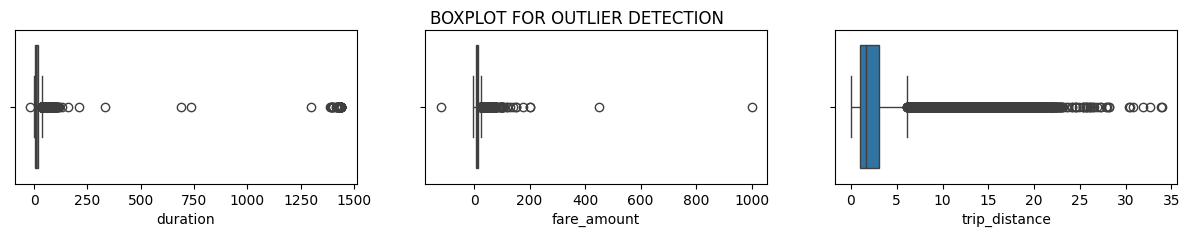

In [8]:
#Generating box plots for outlier detection in interest variables
fig, axes = plt.subplots(1,3, figsize=(15,2))
fig.suptitle('BOXPLOT FOR OUTLIER DETECTION')

#Generating vusializations
sns.boxplot(x=df['duration'],ax=axes[0])
sns.boxplot(x=df['fare_amount'],ax=axes[1])
sns.boxplot(x=df['trip_distance'],ax=axes[2])
plt.show()

In [9]:
#Generating count of all values in interest variables below 1
print('Count Of Values In Interest Variables Below 1 \nFare Amount: {} Values \nTrip Distance: {} Values \nDuration: {} Values'.
      format(sum(df['fare_amount']<=0),
             sum(df['trip_distance']<=0),
             sum(df['duration']<=0)))

#Generating descrptive statistics of all 0 values in interest variables
df[['fare_amount','trip_distance','duration']].describe()

Count Of Values In Interest Variables Below 1 
Fare Amount: 20 Values 
Trip Distance: 148 Values 
Duration: 27 Values


,fare_amount,trip_distance,duration
count,22699.000000,22699.000000,22699.000000
mean,13.026629,2.913313,17.013777
std,13.243791,3.653171,61.996482
min,-120.000000,0.000000,-16.983333
25%,6.500000,0.990000,6.650000
50%,9.500000,1.610000,11.183333
75%,14.500000,3.060000,18.383333
max,999.990000,33.960000,1439.550000


### IMPUTING OUTLIERS  
1. The maximum fare amount in this dataset is nearly 1,000, which seems very unlikely hence an outlier.  
2. The interquartile range (IQR) is 8. The standard formula of Q3 + (1.5 * IQR) yields 26.50.  
That doesn’t seem appropriate for the maximum fare cap. In this case, we’ll use a factor of 6, which results in a cap of 62.50.  
3. While values less than 0 (also outliers) will be impute with 0  

In [10]:
#Generaring iqr and upper limit
for i in ["fare_amount","duration"]:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    upper_limit = df[i].quantile(0.75) + (6 * iqr)
    
    #Printing upper limit
    print(i)
    print('Upper Limit: ${}'.format(
    round(upper_limit, 2)))
    
    #Imputing outliers in fare amount
    df.loc[df[i] < 0, i ] = 0
    df.loc[df[i] > upper_limit, i ] = upper_limit
    print(df[i].describe())

fare_amount
Upper Limit: $62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64
duration
Upper Limit: $88.78
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


### FEATURE ENGINEERING  
1. [X] Location ID column
2. [X] Average Trip Distance By Location ID  
3. [X] Mean Distance Column
4. [X] Mean Duration Column

In [11]:
#Generating a loc_id column from PULocationID and DOLocationID
df['loc_id'] = df['PULocationID'].astype(str) +' '+ df['DOLocationID'].astype(str)
print('loc_id Preview \n', df[['loc_id']][:5], '\n')

#Generating mean trip distance by loc_id
distance_df = df.groupby(df['loc_id']).mean(numeric_only=True)[['trip_distance']]

#Rounding trip_distance to 3dp
distance_df['trip_distance'] = round(distance_df['trip_distance'],3)
print('Average Trip Distance By loc_id \n', distance_df[:5])

loc_id Preview 
     loc_id
0  100 231
1   186 43
2  262 236
3   188 97
4    4 112 

Average Trip Distance By loc_id 
          trip_distance
loc_id                
1 1              2.433
10 148          15.700
100 1           16.890
100 100          0.253
100 107          1.180


In [12]:
#Converting distance_df to a dictionary
distance_dict = distance_df.to_dict()

#Reassigning distance_dict to contain only inner dictionary
distance_dict = distance_dict['trip_distance']

#Generating mean distance with location ID
df['mean_distance'] = df['loc_id']

#Mapping Location ID to mean distance column
df['mean_distance'] = df['mean_distance'].map(distance_dict)

#Confirming mapping
df.sort_values(by=['loc_id'])[['loc_id','mean_distance']][:4]

,loc_id,mean_distance
6485,1 1,2.433
13359,1 1,2.433
3582,1 1,2.433
7867,10 148,15.700


In [13]:
#Generating mean duration by loc_id
duration_df = df.groupby('loc_id').mean(numeric_only=True)[['duration']]

#Converting distance_df to a dictionary
duration_dict = duration_df.to_dict()

#Reassigning distance_dict to contain only inner dictionary
duration_dict = duration_dict['duration']

#Generating mean distance with location ID
df['mean_duration'] = df['loc_id']

#Mapping Location ID to mean distance column
df['mean_duration'] = df['mean_duration'].map(duration_dict)

#Confirming mapping
df.sort_values(by=['loc_id'])[['loc_id','mean_duration']][:4]

,loc_id,mean_duration
6485,1 1,0.466667
13359,1 1,0.466667
3582,1 1,0.466667
7867,10 148,69.366667


### LINEAR REGRESSION MODEL PREP
1. [X] Isolate Interest Variables
2. [X] Generate Pairplot To Verify Interest Variables' Linear Correlation
3. [X] Generate A Correlation Matrix Of Interest Variables

In [14]:
#Generating a data frame with only interest variables
df0 = df.drop(columns=['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'trip_distance',
                       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
                       'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
                       'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration','loc_id'])

#Generating view of columns
df0.columns

Index(['VendorID', 'passenger_count', 'fare_amount', 'mean_distance',
       'mean_duration'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

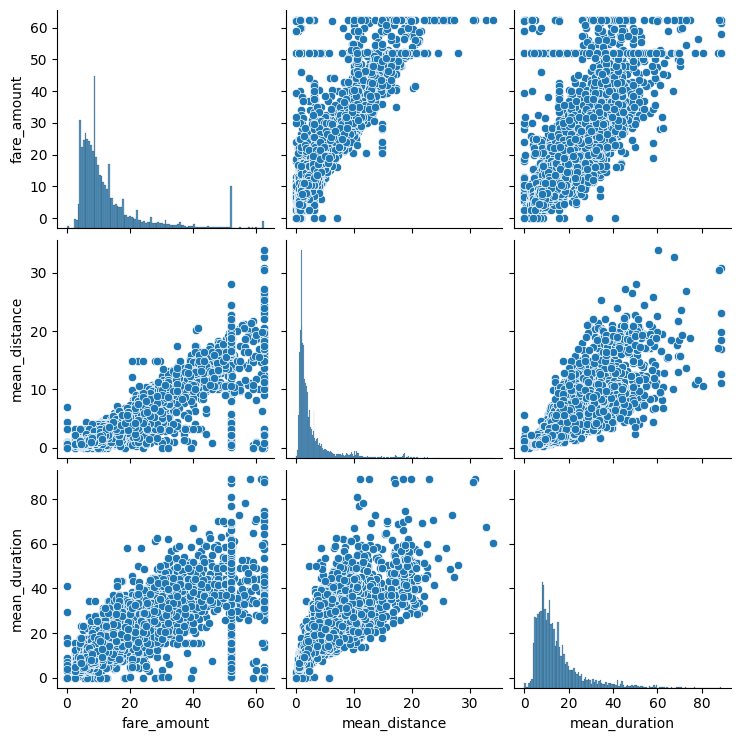

In [15]:
#Generating pairplot of interest variables
plt.suptitle("PAIRPLOT OF INTEREST VARIABLES", y=1.02)
sns.pairplot(df0[['fare_amount','mean_distance','mean_duration']]) #Generating vusializations
plt.show()

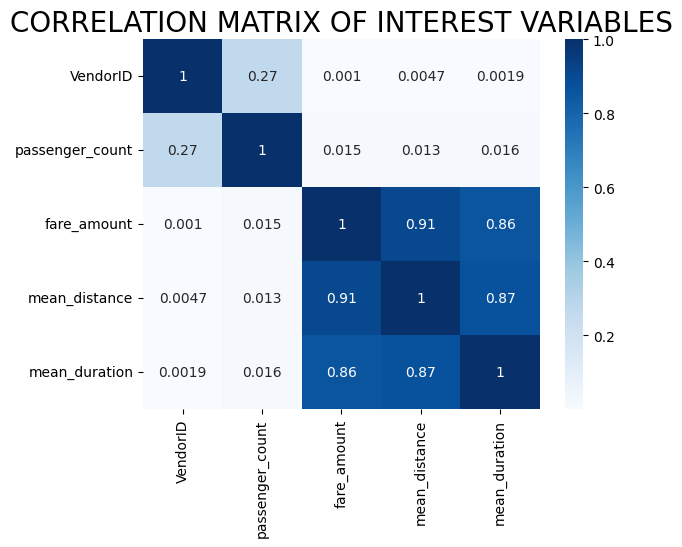

In [16]:
#Generating heatmap of interest variables' correlations 
plt.title("CORRELATION MATRIX OF INTEREST VARIABLES", fontsize=20)
sns.heatmap(df0.corr(method='pearson'), annot=True, cmap='Blues') #Generating vusialization
plt.show()

### LINEAR REGRESSION MODEL ENGINEERING
1. [X] Define X and y variables
2. [X] Generate Train and Test Datasets
3. [X] Standardize The Data
4. [X] Define and Train A Model
5. [X] Generate Predictions
6. [X] Evaluate Model Predctions

In [17]:
#Defining X and y variables
X = df0.drop(columns=['fare_amount'])
y = df0.fare_amount

#Generating train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Generating dataframe for split
split = pd.DataFrame(data={"Dimensions":[X_train.shape,X_test.shape,y_train.size,y_test.size]},
                     index=["X Train","X Test","Y Train","Y Test"])

#Previewing split
split

,Dimensions
X Train,"(17024, 4)"
X Test,"(5675, 4)"
Y Train,17024
Y Test,5675


In [18]:
#Standardizing data
standardizer = StandardScaler().fit(X_train)
X_train_stand = standardizer.transform(X_train)
X_test_stand = standardizer.transform(X_test)

#Defining and fitting model 
lr = LinearRegression().fit(X_train_stand, y_train)

#Generate Predictions
y_pred = lr.predict(X_test_stand)

### MODEL EVALUATION

In [19]:
#Evaluating model on test dataset
lr_r2 = round(r2_score(y_test,y_pred),3)
lr_mae = round(mean_absolute_error(y_test,y_pred),6)
lr_mape = round(mean_absolute_percentage_error(y_pred,y_test)*100,0)
lr_mse = round(mean_squared_error(y_test,y_pred),6)

#Generating dataframe for results
lr_results = pd.DataFrame(data={'R² Score': lr_r2,
                                'Mean Absolute Error' : lr_mae,
                                'Mean Absolute % Error': f'{lr_mape}%',
                                'Mean Squared Error': lr_mse},
                          index = ["LINEAR REGRESSION"])

#Previewing results
lr_results

,R² Score,Mean Absolute Error,Mean Absolute % Error,Mean Squared Error
LINEAR REGRESSION,0.831,2.138651,22.0%,17.867559


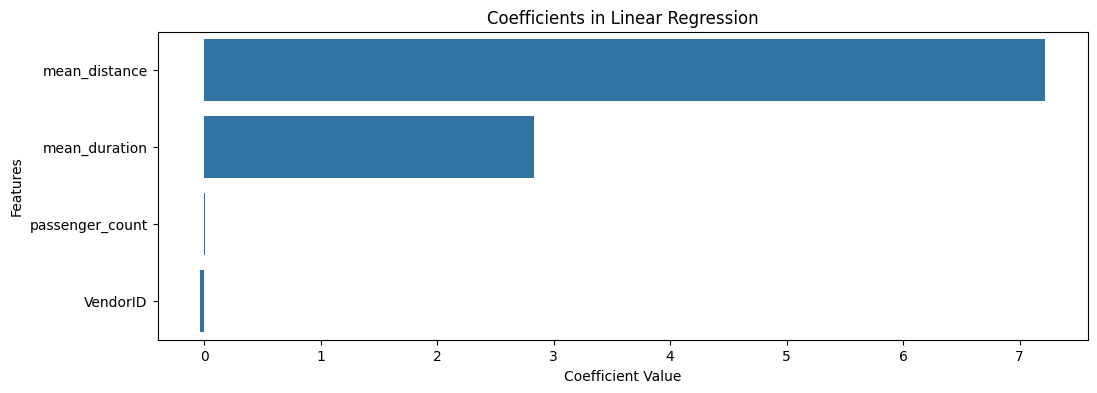

In [20]:
#Defining coefficients and features
coefficients = lr.coef_
features = X.columns

# Create a DataFrame for plotting
coefficients_df = pd.DataFrame({'Features': features, 'Coefficients': coefficients})
coefficients_df = coefficients_df.sort_values(by=['Coefficients'], ascending=False)

# Plot using Seaborn
plt.figure(figsize=(12, 4))
sns.barplot(x='Coefficients', y='Features', data=coefficients_df)
plt.title('Coefficients in Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

In [21]:
rate = coefficients_df.loc[2,'Coefficients'] / X_train['mean_distance'].std()
print('CONCLUSION:\nFor Every Mile Traveled The Fare Increased On Average By ${:.2f}'.
      format(rate))

CONCLUSION:
For Every Mile Traveled The Fare Increased On Average By $2.01
